In [1]:
#Everything that I will need throughout this project is improted here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
#Import the data and preview it
data = pd.read_csv("Diamonds Prices.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
#use pd.Dataframe.info() to see dtypes, column names, and "non-null counts"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
#Seperate numerical columns and categorical columns
cats = data.select_dtypes("object")
nums = data.select_dtypes(np.number)
num_columns = list(nums.columns)
num_columns.remove("price")

In [6]:
#Print all values for categorical columns
for column in cats.columns:
    print(data[column].value_counts(), "\n")

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64 

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64 



C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


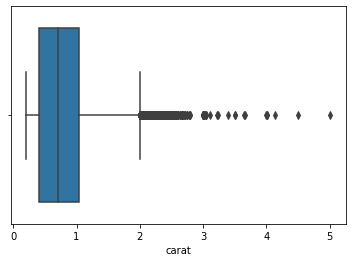

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


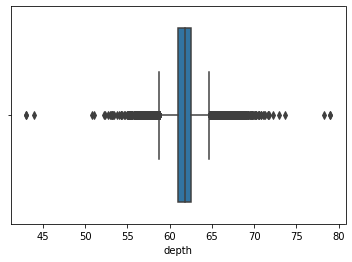

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


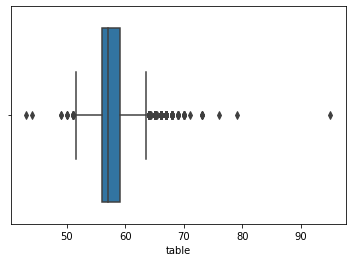

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


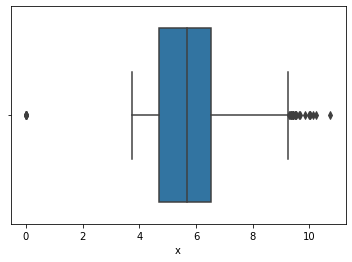

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


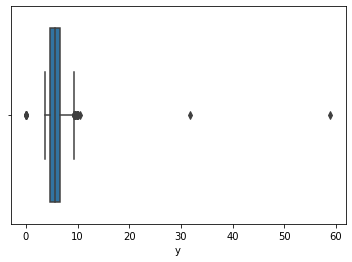

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


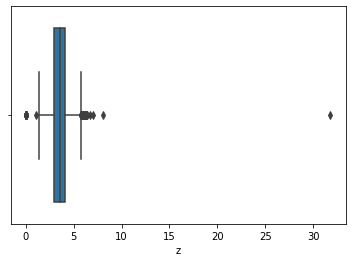

In [7]:
#Using box plots to identify outliers
for column in num_columns:
    sns.boxplot(data[column])
    plt.show()

In [8]:
#Making a pd.Dataframe with zscores for every value and then making a pd.Dataframe with T/F values
#based on the zscores.
z_score_df = stats.zscore(nums)
tf_df = pd.DataFrame()

In [9]:
#Sets the values in the boolean pd.DataFrame to T/F based on its zscore (if zscore inbetween -3, 3)
for column in +z_score_df.columns:
    tf_df[column] = z_score_df[column].between(-3,3)

In [10]:
#Check the number of false values per category in the pd.DataFrame
for x in tf_df.columns:
    print(tf_df[x].value_counts())

True     53504
False      439
Name: carat, dtype: int64
True     53258
False      685
Name: depth, dtype: int64
True     53607
False      336
Name: table, dtype: int64
True     52737
False     1206
Name: price, dtype: int64
True     53900
False       43
Name: x, dtype: int64
True     53909
False       34
Name: y, dtype: int64
True     53888
False       55
Name: z, dtype: int64


In [11]:
#Sets all values that were not in range of -3, 3 to Null values
nums = nums[tf_df]

In [12]:
#Check amount of null values we now have
nums.isnull().sum()

carat     439
depth     685
table     336
price    1206
x          43
y          34
z          55
dtype: int64

In [13]:
#Merge my catagorical and numerical columns to prep it for data removal
data = pd.concat([nums, cats], axis = 1)

In [14]:
data

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,Premium,E,SI1
2,0.23,NaN,NaN,327.0,4.05,4.07,2.31,Good,E,VS1
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,Good,J,SI2
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74,Premium,H,SI2
53939,0.75,62.2,55.0,2757.0,5.83,5.87,3.64,Ideal,D,SI2
53940,0.71,60.5,55.0,2756.0,5.79,5.74,3.49,Premium,E,SI1
53941,0.71,59.8,62.0,2756.0,5.74,5.73,3.43,Premium,F,SI1


In [15]:
#Store original size of our pd.DataFrame into a variable for later use.
#DELETE all rows with null values (these are outliers.)
o_size = data.shape[0]
data = data.dropna()
print(f"Data lost is {o_size - data.shape[0]} rows, or {round((1-(data.shape[0]/o_size))*100, 2)}%")

Data lost is 2350 rows, or 4.36%


In [16]:
data.shape

(51593, 10)

In [17]:
#Seperate our X and Y from our data.
y = data['price'].reset_index(drop = True)
X = data.drop("price", axis = 1)

In [18]:
X

,carat,depth,table,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1
3,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2
5,0.24,62.8,57.0,3.94,3.96,2.48,Very Good,J,VVS2
...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,6.15,6.12,3.74,Premium,H,SI2
53939,0.75,62.2,55.0,5.83,5.87,3.64,Ideal,D,SI2
53940,0.71,60.5,55.0,5.79,5.74,3.49,Premium,E,SI1
53941,0.71,59.8,62.0,5.74,5.73,3.43,Premium,F,SI1


<AxesSubplot:>

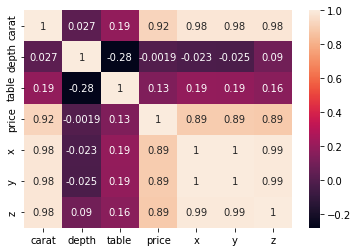

In [19]:
#Quickly check my data for correlations
sns.heatmap(data.corr(), annot = True)

In [20]:
#Seperate data again for scaling.
nums = data.select_dtypes(np.number).drop("price", axis = 1).reset_index(drop = True)
cats = data.select_dtypes("object")

In [21]:
nums

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.29,62.4,58.0,4.20,4.23,2.63
3,0.31,63.3,58.0,4.34,4.35,2.75
4,0.24,62.8,57.0,3.94,3.96,2.48
...,...,...,...,...,...,...
51588,0.86,61.0,58.0,6.15,6.12,3.74
51589,0.75,62.2,55.0,5.83,5.87,3.64
51590,0.71,60.5,55.0,5.79,5.74,3.49
51591,0.71,59.8,62.0,5.74,5.73,3.43


In [22]:
cats

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
3,Premium,I,VS2
4,Good,J,SI2
5,Very Good,J,VVS2
...,...,...,...
53938,Premium,H,SI2
53939,Ideal,D,SI2
53940,Premium,E,SI1
53941,Premium,F,SI1


In [23]:
#Due to the nature of our data, Ordianl Encoding is used to set a "natural ranking" in our categorical columns.
cats['cut'] = X['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
cats['clarity'] = X['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})
cats['color'] = X['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
cats = cats.reset_index(drop = True)

In [24]:
cats

,cut,color,clarity
0,4,5,1
1,3,5,2
2,3,1,3
3,1,0,1
4,2,0,5
...,...,...,...
51588,3,2,1
51589,4,6,1
51590,3,5,2
51591,3,4,2


In [25]:
#Make a dictionary to store values from 3 different methods of scaling our numerical data.
#These values are placed into a pd.DataFrame for easy use in the future
scaled_nums = {}

scaler = RobustScaler()
scaled_nums['Robust'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)
  
scaler = StandardScaler()
scaled_nums['Standard'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)
  
scaler = MinMaxScaler()
scaled_nums['MinMax'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)

In [26]:
def ar2_score(r2, row_count, ind_col):
    return 1-(1-r2)*(row_count-1)/(row_count-ind_col-1)

In [27]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

def into_models(scaled_nums_in, cats_in, t_size):
    out_dict = {}
    out_list = []
    
    print("\n\t\t\t\t\t\t--Linear Regression Model and Results--")
    results = []
    for key in scaled_nums_in.keys():    
        temp_dict = {}
        X = pd.concat([scaled_nums_in[key], cats_in], axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=4)
        lm = LinearRegression()
        model = lm.fit(X_train,y_train)
        predictions = lm.predict(X_test)
        print(f"Scores:\nAdjusted R2 Score: {ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])}, R2 Score: {r2_score(y_test, predictions)}, MSE Score: {mean_squared_error(y_test, predictions)}")
        temp_dict["AR2"] = ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])
        temp_dict['R2'] = r2_score(y_test, predictions)
        temp_dict['MSE'] = mean_squared_error(y_test, predictions)
        results.append(temp_dict)
        out_list.append(["Linear", ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1]), r2_score(y_test, predictions), mean_squared_error(y_test, predictions), t_size, key])
    out_dict['Linear'] = results
    
        
        
    print("\n\t\t\t\t\t\t--Ridge Regression Model and Results--")
    results = []
    for key in scaled_nums_in.keys():    
        temp_dict = {}
        X = pd.concat([scaled_nums_in[key], cats_in], axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=4)
        clf = Ridge()
        model = clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        print(f"Scores:\nAdjusted R2 Score: {ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])}, R2 Score: {r2_score(y_test, predictions)}, MSE Score: {mean_squared_error(y_test, predictions)}")
        temp_dict["AR2"] = ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])
        temp_dict['R2'] = r2_score(y_test, predictions)
        temp_dict['MSE'] = mean_squared_error(y_test, predictions)
        results.append(temp_dict)
        out_list.append(["Ridge", ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1]), r2_score(y_test, predictions), mean_squared_error(y_test, predictions), t_size, key])
    out_dict['Ridge'] = results
        
    print("\n\t\t\t\t\t\t--BayesianRidge Regression Model and Results--")
    results = []
    for key in scaled_nums_in.keys():    
        temp_dict = {}
        X = pd.concat([scaled_nums_in[key], cats_in], axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=4)
        brr = BayesianRidge()
        model = brr.fit(X_train,y_train)
        predictions = brr.predict(X_test)
        print(f"Scores:\nAdjusted R2 Score: {ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])}, R2 Score: {r2_score(y_test, predictions)}, MSE Score: {mean_squared_error(y_test, predictions)}")
        temp_dict["AR2"] = ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])
        temp_dict['R2'] = r2_score(y_test, predictions)
        temp_dict['MSE'] = mean_squared_error(y_test, predictions)
        results.append(temp_dict)
        out_list.append(["Bayesian", ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1]), r2_score(y_test, predictions), mean_squared_error(y_test, predictions), t_size, key])
    out_dict['Bayesian'] = results
        
    print("\n\t\t\t\t\t\t--KNeighborsRegressor Regression Model and Results--")
    results = []
    for key in scaled_nums_in.keys():    
        temp_dict = {}
        X = pd.concat([scaled_nums_in[key], cats_in], axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=4)
        neigh = KNeighborsRegressor()
        model = neigh.fit(X_train,y_train)
        predictions = neigh.predict(X_test)
        print(f"Scores:\nAdjusted R2 Score: {ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])}, R2 Score: {r2_score(y_test, predictions)}, MSE Score: {mean_squared_error(y_test, predictions)}")
        temp_dict["AR2"] = ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])
        temp_dict['R2'] = r2_score(y_test, predictions)
        temp_dict['MSE'] = mean_squared_error(y_test, predictions)
        results.append(temp_dict)
        out_list.append(["KNeighbor", ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1]), r2_score(y_test, predictions), mean_squared_error(y_test, predictions), t_size, key])
    out_dict['KNeighbor'] = results
        
        
    print("\n\t\t\t\t\t\t--DecisionTreeRegressor Regression Model and Results--")
    results = []
    for key in scaled_nums_in.keys():
        temp_dict = {}
        X = pd.concat([scaled_nums_in[key], cats_in], axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=4)
        tree = DecisionTreeRegressor()
        model = tree.fit(X_train,y_train)
        predictions = tree.predict(X_test)
        print(f"Scores:\nAdjusted R2 Score: {ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])}, R2 Score: {r2_score(y_test, predictions)}, MSE Score: {mean_squared_error(y_test, predictions)}")
        temp_dict["AR2"] = ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])
        temp_dict['R2'] = r2_score(y_test, predictions)
        temp_dict['MSE'] = mean_squared_error(y_test, predictions)
        results.append(temp_dict)
        out_list.append(["Tree", ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1]), r2_score(y_test, predictions), mean_squared_error(y_test, predictions), t_size, key])
    out_dict['Tree'] = results
          
    print("\n\t\t\t\t\t\t--SVR Regression Model and Results--")
    results = []
    for key in scaled_nums_in.keys():    
        temp_dict = {}
        X = pd.concat([scaled_nums_in[key], cats_in], axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=4)
        tree = DecisionTreeRegressor()
        model = tree.fit(X_train,y_train)
        predictions = tree.predict(X_test)
        print(f"Scores:\nAdjusted R2 Score: {ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])}, R2 Score: {r2_score(y_test, predictions)}, MSE Score: {mean_squared_error(y_test, predictions)}")
        temp_dict["AR2"] = ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1])
        temp_dict['R2'] = r2_score(y_test, predictions)
        temp_dict['MSE'] = mean_squared_error(y_test, predictions)
        results.append(temp_dict)
        out_list.append(["SVR", ar2_score(r2_score(y_test, predictions), X_test.shape[0], X_test.shape[1]), r2_score(y_test, predictions), mean_squared_error(y_test, predictions), t_size, key])
    out_dict['SVR'] = results
    
    return out_dict, out_list

In [28]:
results_dict_1, results_list_1 = into_models(scaled_nums, cats, .25)


						--Linear Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9147028000051918, R2 Score: 0.9147623189073435, MSE Score: 1001167.327703348
Scores:
Adjusted R2 Score: 0.9147028000051921, R2 Score: 0.9147623189073438, MSE Score: 1001167.3277033436
Scores:
Adjusted R2 Score: 0.914702800005192, R2 Score: 0.9147623189073437, MSE Score: 1001167.3277033453

						--Ridge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9147053974995389, R2 Score: 0.9147649145892044, MSE Score: 1001136.8398740338
Scores:
Adjusted R2 Score: 0.914704358964272, R2 Score: 0.9147638767786093, MSE Score: 1001149.0295775421
Scores:
Adjusted R2 Score: 0.9146089675607522, R2 Score: 0.9146685519375511, MSE Score: 1002268.6766064432

						--BayesianRidge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9147034193212719, R2 Score: 0.9147629377912756, MSE Score: 1001160.0585429886
Scores:
Adjusted R2 Score: 0.9147033088627704, R2 Score: 0.9147628274098502, MSE Score: 1001161.3550385688


In [29]:
results_df = pd.DataFrame(results_list_1, columns = ["Model_Type", "AR2_Score", "R2_Score", "MSE_Score", "Test_Size", "Scaling_Method"])

In [30]:
for item in list(results_df['Scaling_Method'].unique()):
    print(item, np.mean(results_df[results_df["Scaling_Method"] == item]["AR2_Score"]))

Robust 0.9410340567535539
Standard 0.9420641230210457
MinMax 0.9404694649376948


In [31]:
results_dict_1, results_list_1 = into_models(scaled_nums, cats, .2)


						--Linear Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9154389021752865, R2 Score: 0.915512661613203, MSE Score: 996907.9070487693
Scores:
Adjusted R2 Score: 0.9154389021752865, R2 Score: 0.915512661613203, MSE Score: 996907.9070487696
Scores:
Adjusted R2 Score: 0.9154389021752865, R2 Score: 0.915512661613203, MSE Score: 996907.9070487699

						--Ridge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.915437750000429, R2 Score: 0.915511510443344, MSE Score: 996921.4902714954
Scores:
Adjusted R2 Score: 0.9154385976352843, R2 Score: 0.9155123573388395, MSE Score: 996911.4973325281
Scores:
Adjusted R2 Score: 0.9153125141285642, R2 Score: 0.9153863838099795, MSE Score: 998397.9213269078

						--BayesianRidge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9154390644229772, R2 Score: 0.9155128237193711, MSE Score: 996905.9942778872
Scores:
Adjusted R2 Score: 0.9154388951006551, R2 Score: 0.9155126545447425, MSE Score: 996907.990453032
Scores:
Adj

In [32]:
results_dict_2, results_list_2 = into_models(scaled_nums, cats, .25)


						--Linear Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9147028000051918, R2 Score: 0.9147623189073435, MSE Score: 1001167.327703348
Scores:
Adjusted R2 Score: 0.9147028000051921, R2 Score: 0.9147623189073438, MSE Score: 1001167.3277033436
Scores:
Adjusted R2 Score: 0.914702800005192, R2 Score: 0.9147623189073437, MSE Score: 1001167.3277033453

						--Ridge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9147053974995389, R2 Score: 0.9147649145892044, MSE Score: 1001136.8398740338
Scores:
Adjusted R2 Score: 0.914704358964272, R2 Score: 0.9147638767786093, MSE Score: 1001149.0295775421
Scores:
Adjusted R2 Score: 0.9146089675607522, R2 Score: 0.9146685519375511, MSE Score: 1002268.6766064432

						--BayesianRidge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9147034193212719, R2 Score: 0.9147629377912756, MSE Score: 1001160.0585429886
Scores:
Adjusted R2 Score: 0.9147033088627704, R2 Score: 0.9147628274098502, MSE Score: 1001161.3550385688


In [33]:
results_dict_3, results_list_3 = into_models(scaled_nums, cats, .3)


						--Linear Regression Model and Results--
Scores:
Adjusted R2 Score: 0.914996714839006, R2 Score: 0.9150461449331101, MSE Score: 994657.7366187046
Scores:
Adjusted R2 Score: 0.9149967148390061, R2 Score: 0.9150461449331102, MSE Score: 994657.7366187026
Scores:
Adjusted R2 Score: 0.9149967148390062, R2 Score: 0.9150461449331103, MSE Score: 994657.7366187015

						--Ridge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.914992904949496, R2 Score: 0.9150423372590816, MSE Score: 994702.3176730663
Scores:
Adjusted R2 Score: 0.9149961842239919, R2 Score: 0.9150456146266529, MSE Score: 994663.9455590757
Scores:
Adjusted R2 Score: 0.9148548984542181, R2 Score: 0.9149044110156908, MSE Score: 996317.187356889

						--BayesianRidge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.914996629528679, R2 Score: 0.9150460596723917, MSE Score: 994658.7348692623
Scores:
Adjusted R2 Score: 0.914996663610747, R2 Score: 0.9150460937346407, MSE Score: 994658.3360612317
Scores:
Ad

In [34]:
#Create pd.DataFrame from the results.
results_df = pd.DataFrame(results_list_1 + results_list_2 + results_list_3, columns = ["Model_Type", "AR2_Score", "R2_Score", "MSE_Score", "Test_Size", "Scaling_Method"])

In [35]:
results_df.sort_values(["AR2_Score"], ascending = False)
#Indices 10, 28, 46 have the highest scores.

,Model_Type,AR2_Score,R2_Score,MSE_Score,Test_Size,Scaling_Method
10,KNeighbor,0.971268,0.971294,3.387221e+05,0.20,Standard
28,KNeighbor,0.970350,0.970371,3.480160e+05,0.25,Standard
17,SVR,0.970049,0.970075,3.531003e+05,0.20,MinMax
32,Tree,0.969894,0.969915,3.533706e+05,0.25,MinMax
53,SVR,0.969748,0.969765,3.539930e+05,0.30,MinMax
46,KNeighbor,0.969514,0.969532,3.567283e+05,0.30,Standard
14,Tree,0.969405,0.969432,3.606907e+05,0.20,MinMax
13,Tree,0.969383,0.969410,3.609462e+05,0.20,Standard
31,Tree,0.969348,0.969370,3.597731e+05,0.25,Standard
34,SVR,0.969325,0.969346,3.600469e+05,0.25,Standard


In [36]:
results_df.to_csv("First_Set_Results.csv")

In [37]:
for item in list(results_df['Test_Size'].unique()):
    print(item, np.mean(results_df[results_df["Test_Size"] == item]["AR2_Score"]))
#A 20% Test size seems to have the highest accuracy.

0.2 0.9417602418748072
0.25 0.9411892264498013
0.3 0.941060363499941


In [38]:
for item in list(results_df['Scaling_Method'].unique()):
    print(item, np.mean(results_df[results_df["Scaling_Method"] == item]["AR2_Score"]))

Robust 0.940987832701804
Standard 0.9423495833976074
MinMax 0.9406724157251384


In [39]:
for item in list(results_df['Model_Type'].unique()):
    print(item, np.mean(results_df[results_df["Model_Type"] == item]["AR2_Score"]))

Linear 0.9150461390064949
Ridge 0.9150057303796163
Bayesian 0.9150461773697255
KNeighbor 0.9643927448665168
Tree 0.9692415909470093
SVR 0.9692872810797368


In [40]:
#Going to delete depth due to its lack of correlation in our data and check accuracy imrpovements.
nums = data.select_dtypes(np.number).drop(["price", "depth"], axis = 1).reset_index(drop = True)
scaled_nums = {}

scaler = RobustScaler()
scaled_nums['Robust'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)
  
scaler = StandardScaler()
scaled_nums['Standard'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)
  
scaler = MinMaxScaler()
scaled_nums['MinMax'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)

In [41]:
#Save old results for comparison
old_results_df = results_df[results_df["Test_Size"] == .2]

In [42]:
results_dict_1, results_list_1 = into_models(scaled_nums, cats, .2)


						--Linear Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9153563133105778, R2 Score: 0.9154219412901781, MSE Score: 997978.3610254301
Scores:
Adjusted R2 Score: 0.9153563133105778, R2 Score: 0.9154219412901781, MSE Score: 997978.3610254301
Scores:
Adjusted R2 Score: 0.9153563133105778, R2 Score: 0.915421941290178, MSE Score: 997978.3610254303

						--Ridge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9153619175585013, R2 Score: 0.9154275411928812, MSE Score: 997912.285002797
Scores:
Adjusted R2 Score: 0.9153582917641302, R2 Score: 0.9154239182097482, MSE Score: 997955.0343733093
Scores:
Adjusted R2 Score: 0.9152989902619962, R2 Score: 0.9153646626866816, MSE Score: 998654.2196075628

						--BayesianRidge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9153571900672436, R2 Score: 0.9154228173670558, MSE Score: 997968.0237608971
Scores:
Adjusted R2 Score: 0.9153568848204701, R2 Score: 0.9154225123569535, MSE Score: 997971.6227260018
Scores:

In [43]:
results_df = pd.DataFrame(results_list_1, columns = ["Model_Type", "AR2_Score", "R2_Score", "MSE_Score", "Test_Size", "Scaling_Method"])

In [44]:
np.mean(old_results_df['AR2_Score'])

0.9417602418748072

In [45]:
np.mean(results_df['AR2_Score'])

0.9428663460559645

In [46]:
for item in list(results_df['Scaling_Method'].unique()):
    print(item, np.mean(results_df[results_df["Scaling_Method"] == item]["AR2_Score"]))

Robust 0.9430479144977215
Standard 0.9434497791422091
MinMax 0.9421013445279631


In [47]:
for item in list(results_df['Model_Type'].unique()):
    print(item, np.mean(results_df[results_df["Model_Type"] == item]["AR2_Score"]))

Linear 0.9153563133105779
Ridge 0.9153397331948759
Bayesian 0.9153569977495849
KNeighbor 0.9709180085063626
Tree 0.9701344103525728
SVR 0.9700926132218135


In [48]:
old_results_df = results_df

In [49]:
data = data.reset_index(drop = True)

In [50]:
#Use feature engineering to make columns with possible accuracy improvements
table_percent = [data.loc[index][2] / data.loc[index][4] for index in range(len(data))]
depth_percent = [data.loc[index][1] / data.loc[index][4] for index in range(len(data))]

In [51]:
data['Table_Percent'] = table_percent
data['Depth_Percent']= depth_percent

<AxesSubplot:>

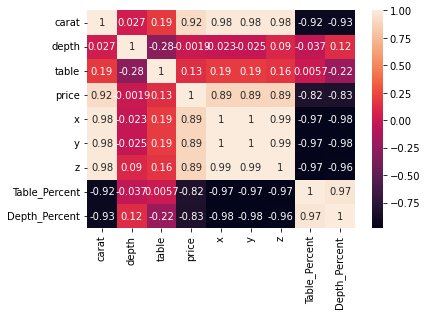

In [52]:
sns.heatmap(data.corr(), annot = True)

In [59]:
nums = data.select_dtypes(np.number).drop(["price", "depth"], axis = 1).reset_index(drop = True)
scaled_nums = {}

scaler = RobustScaler()
scaled_nums['Robust'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)
  
scaler = StandardScaler()
scaled_nums['Standard'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)
  
scaler = MinMaxScaler()
scaled_nums['MinMax'] = pd.DataFrame(scaler.fit_transform(nums), columns = nums.columns)

In [60]:
nums 

,carat,depth,table,x,y,z,Table_Percent,Depth_Percent
0,0.23,61.5,55.0,3.95,3.98,2.43,13.924051,15.569620
1,0.21,59.8,61.0,3.89,3.84,2.31,15.681234,15.372751
2,0.29,62.4,58.0,4.20,4.23,2.63,13.809524,14.857143
3,0.31,63.3,58.0,4.34,4.35,2.75,13.364055,14.585253
4,0.24,62.8,57.0,3.94,3.96,2.48,14.467005,15.939086
...,...,...,...,...,...,...,...,...
51588,0.86,61.0,58.0,6.15,6.12,3.74,9.430894,9.918699
51589,0.75,62.2,55.0,5.83,5.87,3.64,9.433962,10.668954
51590,0.71,60.5,55.0,5.79,5.74,3.49,9.499136,10.449050
51591,0.71,59.8,62.0,5.74,5.73,3.43,10.801394,10.418118


In [61]:
results_dict_1, results_list_1 = into_models(scaled_nums, cats, .2)


						--Linear Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9179857134280118, R2 Score: 0.9180731487015428, MSE Score: 966695.4530526905
Scores:
Adjusted R2 Score: 0.9179857134280118, R2 Score: 0.9180731487015428, MSE Score: 966695.4530526908
Scores:
Adjusted R2 Score: 0.9179857134280118, R2 Score: 0.9180731487015428, MSE Score: 966695.4530526905

						--Ridge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.917981150171717, R2 Score: 0.9180685903101267, MSE Score: 966749.239768345
Scores:
Adjusted R2 Score: 0.9179838061569211, R2 Score: 0.9180712434637901, MSE Score: 966717.9338955806
Scores:
Adjusted R2 Score: 0.9179057964160954, R2 Score: 0.9179933168889993, MSE Score: 967637.42810692

						--BayesianRidge Regression Model and Results--
Scores:
Adjusted R2 Score: 0.9179850839091698, R2 Score: 0.9180725198538295, MSE Score: 966702.8731379919
Scores:
Adjusted R2 Score: 0.9179848099969864, R2 Score: 0.9180722462336633, MSE Score: 966706.1017177107
Scores:
A

In [62]:
results_df = pd.DataFrame(results_list_1, columns = ["Model_Type", "AR2_Score", "R2_Score", "MSE_Score", "Test_Size", "Scaling_Method"])

In [63]:
for item in list(results_df['Scaling_Method'].unique()):
    print(item, np.mean(results_df[results_df["Scaling_Method"] == item]["AR2_Score"]))

Robust 0.9432898007898034
Standard 0.9442030311296166
MinMax 0.9428526302744201


In [64]:
for item in list(results_df['Model_Type'].unique()):
    print(item, np.mean(results_df[results_df["Model_Type"] == item]["AR2_Score"]))

Linear 0.9179857134280119
Ridge 0.9179569175815779
Bayesian 0.9179847457319892
KNeighbor 0.9672513195458237
Tree 0.9697923808994626
SVR 0.9697198472008148
